In [8]:
import pandas as pd
import numpy as np
import warnings
import os
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

import matplotlib.pyplot as plt
import seaborn as sns

import demoji
import emoji
import nltk
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
from googletrans import Translator
from langdetect import detect_langs

In [5]:
!pip install --upgrade pip==23.3


In [7]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install demoji
!pip install emoji
!pip install demoji
!pip install nltk
!pip install Sastrawi
!pip install wordcloud
!pip install googletrans
!pip install langdetect


     ---------------------------------------- 0.0/155.5 kB ? eta -:--:--
     ------------------------------ ------- 122.9/155.5 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 155.5/155.5 kB 1.6 MB/s eta 0:00:00
  Using cached Pillow-10.1.0-cp39-cp39-win_amd64.whl.metadata (9.6 kB)
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.6 kB 667.8 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.6 kB 667.8 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.6 kB 667.8 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.6 kB 667.8 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.6 kB 449.7 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.6 kB 593.2 kB/s eta 0:00:01
   ----------------------------------- -- 276.5/294.6 kB 682.7 kB/s eta 

     ---------------------------------------- 0.0/42.9 kB ? eta -:--:--
     -------------------------------------- - 41.0/42.9 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 42.9/42.9 kB 693.9 kB/s eta 0:00:00


   ---------------------------------------- 0.0/358.9 kB ? eta -:--:--
   ------------ --------------------------- 112.6/358.9 kB 2.2 MB/s eta 0:00:01
   -------------------------- ------------- 235.5/358.9 kB 2.9 MB/s eta 0:00:01
   ----------------------------------- ---- 317.4/358.9 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------  358.4/358.9 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 358.9/358.9 kB 1.7 MB/s eta 0:00:00



     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     -- ------------------------------------- 0.1/1.5 MB 4.5 MB/s eta 0:00:01
     ----- ---------------------------------- 0.2/1.5 MB 3.4 MB/s eta 0:00:01
     --------- ------------------------------ 0.4/1.5 MB 3.7 MB/s eta 0:00:01
     --------------- ------------------------ 0.6/1.5 MB 3.7 MB/s eta 0:00:01
     ---------------------- ----------------- 0.9/1.5 MB 4.2 MB/s eta 0:00:01
     --------------------------- ------------ 1.0/1.5 MB 4.4 MB/s eta 0:00:01
     -------------------------------- ------- 1.2/1.5 MB 4.4 MB/s eta 0:00:01
     ----------------------------------- ---- 1.3/1.5 MB 4.2 MB/s eta 0:00:01
     ---------------------------------------  1.5/1.5 MB 4.3 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 1.0 MB/s eta 0:00


   ---------------------------------------- 0.0/153.3 kB ? eta -:--:--
   ------------------------------------- -- 143.4/153.3 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 153.3/153.3 kB 2.3 MB/s eta 0:00:00
  Using cached googletrans-3.0.0-py3-none-any.whl
  Using cached httpx-0.13.3-py3-none-any.whl (55 kB)
  Using cached hstspreload-2023.1.1-py3-none-any.whl (1.5 MB)
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached rfc3986-1.5.0-py2.py3-none-any.whl (31 kB)
  Using cached httpcore-0.9.1-py3-none-any.whl (42 kB)
  Using cached h11-0.9.0-py2.py3-none-any.whl (53 kB)
  Using cached h2-3.2.0-py2.py3-none-any.whl (65 kB)
  Using cached hyperframe-5.2.0-py2.py3-none-any.whl (12 kB)
  Using cached hpack-3.0.0-py2.py3-none-any.whl (38 kB)
   ---------------------------------------- 0.0/158.3 kB ? eta -:--:--
   ------------------------------- -------- 122.9/158.3 kB 3.6 MB/s eta 0:00:01
  

  Using cached langdetect-1.0.9-py3-none-any.whl


In [3]:
# Import DataFrame
data_clean = pd.read_csv(r'data\data.csv',index_col=False)
data_clean.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,df983f8b-3dc8-4b00-a62e-6da363100eb3,Ahmad Indra,https://play-lh.googleusercontent.com/a-/ALV-UjXv8CpBArgc62La8C7Nw9m7mntEMfZmLkKopsJWpk4WGoA,Lemot!.. buka Eazy Saham aja loading mulu. Mau searching saham nggak bisa..,1,0,9.9.137,2023-10-17 21:24:12,"Hi Ahmad. Mohon maaf atas ketidaknyamanasnnya. Silakan clear data aplikasi IPOT pada menu setting device yang digunakan & utk transaksi saham dapat dilakukan juga menggunakan tampilan EZ kemudian setting module EZ Buy/Sell. Hub kami mll email ke support@indopremier.com/WA 08119197200. Terima kasih, ditunggu bintang 5 nya :)",2023-10-18 09:20:05,9.9.137
1,767f2b9d-bd2e-48fc-9dcf-db7756d54d4d,Zydan Abli,https://play-lh.googleusercontent.com/a-/ALV-UjVcXbKKbuE-6RaIPv0v-hFim5krBfHbSSyh0JAjijfVpQ,Appnya kenapa lemot ya,3,0,NaN,2023-10-17 11:15:40,Hi Zydan. Mohon maaf atas ketidaknyamanannya. Silakan clear data aplikasi IPOT pada menu setting device yang digunakan dan utk transaksi saham dapat dilakukan juga menggunakan tampilan EZ kemudian setting module EZ Buy/Sell. Pastikan Anda sudah update versi terbaru 9.9.137. Hub kami mll email ke support@indopremier.com/WA 08119197200. Terima kasih,2023-10-17 11:55:37,NaN
2,bf6b9ede-99f5-4428-9843-08b7f88e7ff8,Rezza Tri Umami,https://play-lh.googleusercontent.com/a-/ALV-UjXtrn9dGNv_q0KwJG5pX9I4bqknSfSLylngyEYLuEj0tt8,IPOT IPOTTT KOG LEMOOTT?!!! gak berubah-ubah dari dulu. Sekarang update bukanya makin stabil makin cepet malah semakin LEMOT. Huufftt...,1,0,NaN,2023-10-17 10:51:19,Hi Rezza. Mohon maaf atas ketidaknyamanannya. Silakan clear data aplikasi IPOT pada menu setting device yang digunakan dan utk transaksi saham dapat dilakukan juga menggunakan tampilan EZ kemudian setting module EZ Buy/Sell. Pastikan Anda sudah update versi terbaru 9.9.137. Hub kami mll email ke support@indopremier.com/WA 08119197200. Terima kasih\n,2023-10-17 11:44:23,NaN
3,935558f1-a92a-4d30-b7b6-3d0b98a15644,Wawan Gunawan,https://play-lh.googleusercontent.com/a/ACg8ocJzSsARy-hrGgKa79SrKp6IBP05l5zS8ZBFMv7c5ogP=mo,Assalamu'alaikum warahmatullahi Wabarokatuh berkenan,5,0,9.9.136,2023-10-17 00:41:20,Hi Wawan. Terima kasih atas review dan bintang 5 nya. Semoga Aplikasi IPOT semakin mempermudah dan memberikan kenyamanan dalam transaksi saham Anda. Utk informasi lebih lanjut silakan hubungi Call Center 02150887200&50860608/email ke support@indopremier.com/WA 08119197200. Happy Investing :)\n,2023-10-17 09:19:31,9.9.136
4,8296b2bf-a82b-4eea-864a-3d99a7429499,Rizky Bahari,https://play-lh.googleusercontent.com/a-/ALV-UjX1nw4yOmuMt0LHDqtBfJJEzRPxEZlDPFrtEEMHQeUZGQM,Sorry rubah bintang dari 5 jadi 2. Penarikan biasanya cepat jadi lambat tarik dari 11 oktober sampai tanggal 16 oktober belum masuk.,2,0,9.9.136,2023-10-16 12:36:10,"Hi Rizky. Mohon maaf atas ketidaknyamanannya. Setelah diperiksakan instruksi penarikan dana sudah diproses, silakan cek secara berkala pada rekening tujuan. Utk info lebih lanjut silakan hubungi kami melalui Call Center 02150887200&50860608/email ke support@indopremier.com/WA 08119197200 Terima kasih, ditunggu bintang 5 nya :)",2023-10-16 15:23:58,9.9.136


In [3]:
data = data_clean[['userName','content','score','thumbsUpCount','at']]

# Cleansing

In [4]:
# Check Data Type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   userName       700 non-null    object
 1   content        700 non-null    object
 2   score          700 non-null    int64 
 3   thumbsUpCount  700 non-null    int64 
 4   at             700 non-null    object
dtypes: int64(2), object(3)
memory usage: 27.5+ KB


In [5]:
# Convert coulmns 'at' into datetime

data['at']=pd.to_datetime(data['at'])
data['at']

0     2023-10-17 21:24:12
1     2023-10-17 11:15:40
2     2023-10-17 10:51:19
3     2023-10-17 00:41:20
4     2023-10-16 12:36:10
              ...        
695   2023-01-04 10:48:19
696   2023-01-03 22:10:27
697   2023-01-01 20:28:44
698   2023-01-01 10:31:09
699   2023-01-01 03:24:05
Name: at, Length: 700, dtype: datetime64[ns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   userName       700 non-null    object        
 1   content        700 non-null    object        
 2   score          700 non-null    int64         
 3   thumbsUpCount  700 non-null    int64         
 4   at             700 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 27.5+ KB


### 1. Case Folding

In [7]:
def case_folding(source,text):
    """
    source: Data Frame
    text: Column in Data Frame
    -------
    This function cleanses text data with a case-folding based approach.
    """
    # Demojize and convert to lowercase
    content = pd.Series(source[text]).apply(lambda x: emoji.demojize(x,language='id'))
    source[text]=content
    source[text]=source[text].str.lower()
    
    # Remove non-alphanumeric characters
    source[text]=source[text].str.replace(r'[^\w\s]+',' ', regex=True)
    
    # Strip leading and trailing spaces
    source[text]=source[text].str.strip()
    
    # Replace underscores with spaces
    source[text]=source[text].str.replace('_',' ')

In [8]:
case_folding(data,'content')
data.head(2)

,userName,content,score,thumbsUpCount,at
0,Ahmad Indra,lemot buka eazy saham aja loading mulu mau searching saham nggak bisa,1,0,2023-10-17 21:24:12
1,Zydan Abli,appnya kenapa lemot ya,3,0,2023-10-17 11:15:40


### 2. Tokenize

In [9]:
data['tokenized_sents'] = data.apply(lambda x:nltk.word_tokenize(x['content']),axis=1)
data.head(10)

,userName,content,score,thumbsUpCount,at,tokenized_sents
0,Ahmad Indra,lemot buka eazy saham aja loading mulu mau searching saham nggak bisa,1,0,2023-10-17 21:24:12,"[lemot, buka, eazy, saham, aja, loading, mulu, mau, searching, saham, nggak, bisa]"
1,Zydan Abli,appnya kenapa lemot ya,3,0,2023-10-17 11:15:40,"[appnya, kenapa, lemot, ya]"
2,Rezza Tri Umami,ipot ipottt kog lemoott gak berubah ubah dari dulu sekarang update bukanya makin stabil makin cepet malah semakin lemot huufftt,1,0,2023-10-17 10:51:19,"[ipot, ipottt, kog, lemoott, gak, berubah, ubah, dari, dulu, sekarang, update, bukanya, makin, stabil, makin, cepet, malah, semakin, lemot, huufftt]"
3,Wawan Gunawan,assalamu alaikum warahmatullahi wabarokatuh berkenan,5,0,2023-10-17 00:41:20,"[assalamu, alaikum, warahmatullahi, wabarokatuh, berkenan]"
4,Rizky Bahari,sorry rubah bintang dari 5 jadi 2 penarikan biasanya cepat jadi lambat tarik dari 11 oktober sampai tanggal 16 oktober belum masuk,2,0,2023-10-16 12:36:10,"[sorry, rubah, bintang, dari, 5, jadi, 2, penarikan, biasanya, cepat, jadi, lambat, tarik, dari, 11, oktober, sampai, tanggal, 16, oktober, belum, masuk]"
5,shidiq shop,favorite stock sudah diedit tetapi ketika buka kembali aplikasi favorite stock kembali ke settingan awal saya sudah menggunakan aplikasi terupdate dan sudah login ulang tetapi tetap tidak ada perubahan tolong dibenahi,2,0,2023-10-14 06:40:45,"[favorite, stock, sudah, diedit, tetapi, ketika, buka, kembali, aplikasi, favorite, stock, kembali, ke, settingan, awal, saya, sudah, menggunakan, aplikasi, terupdate, dan, sudah, login, ulang, tetapi, tetap, tidak, ada, perubahan, tolong, dibenahi]"
6,Tjung Aphin,oklah,4,0,2023-10-13 19:47:38,[oklah]
7,Incredible Shoes,perbaiki aplikasi sring error nanti sy pindah ke stock bit,2,0,2023-10-12 18:40:57,"[perbaiki, aplikasi, sring, error, nanti, sy, pindah, ke, stock, bit]"
8,Muhammad Jafar Shidiq,aplikasi nyaman dgn fitur yg baik dan cs ramah,5,0,2023-10-11 11:18:02,"[aplikasi, nyaman, dgn, fitur, yg, baik, dan, cs, ramah]"
9,Hyo UL,mau registrasi susah pollll keluar terus capek,2,0,2023-10-11 10:34:04,"[mau, registrasi, susah, pollll, keluar, terus, capek]"


### 3. Steming

In [10]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [11]:
data['token_stemming'] = data['tokenized_sents'].apply(lambda x:[stemmer.stem(y)for y in x])

In [12]:
data['stem'] = [' '.join(map(str,l))for l in data['token_stemming']]
data.head(2)

,userName,content,score,thumbsUpCount,at,tokenized_sents,token_stemming,stem
0,Ahmad Indra,lemot buka eazy saham aja loading mulu mau searching saham nggak bisa,1,0,2023-10-17 21:24:12,"[lemot, buka, eazy, saham, aja, loading, mulu, mau, searching, saham, nggak, bisa]","[lot, buka, eazy, saham, aja, loading, mulu, mau, searching, saham, nggak, bisa]",lot buka eazy saham aja loading mulu mau searching saham nggak bisa
1,Zydan Abli,appnya kenapa lemot ya,3,0,2023-10-17 11:15:40,"[appnya, kenapa, lemot, ya]","[appnya, kenapa, lot, ya]",appnya kenapa lot ya


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   userName         700 non-null    object        
 1   content          700 non-null    object        
 2   score            700 non-null    int64         
 3   thumbsUpCount    700 non-null    int64         
 4   at               700 non-null    datetime64[ns]
 5   tokenized_sents  700 non-null    object        
 6   token_stemming   700 non-null    object        
 7   stem             700 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 43.9+ KB


### 4. stopwords

In [14]:
listsw = stopwords.words('indonesian')
listsw.extend(['yg','dan','ke','di','nya','ya','itu','lagi','ini','aja','ipot','aplikasi','update','saham','lot'])

def filter_stopwords(word_list):
    return [word for word in word_list if word not in listsw]

# Apply the function to the 'token_stemming' column
data['filtered_stem'] = data['token_stemming'].apply(filter_stopwords)

In [15]:
data.isnull().sum()

userName           0
content            0
score              0
thumbsUpCount      0
at                 0
tokenized_sents    0
token_stemming     0
stem               0
filtered_stem      0
dtype: int64

In [16]:
data.head()

,userName,content,score,thumbsUpCount,at,tokenized_sents,token_stemming,stem,filtered_stem
0,Ahmad Indra,lemot buka eazy saham aja loading mulu mau searching saham nggak bisa,1,0,2023-10-17 21:24:12,"[lemot, buka, eazy, saham, aja, loading, mulu, mau, searching, saham, nggak, bisa]","[lot, buka, eazy, saham, aja, loading, mulu, mau, searching, saham, nggak, bisa]",lot buka eazy saham aja loading mulu mau searching saham nggak bisa,"[buka, eazy, loading, mulu, searching, nggak]"
1,Zydan Abli,appnya kenapa lemot ya,3,0,2023-10-17 11:15:40,"[appnya, kenapa, lemot, ya]","[appnya, kenapa, lot, ya]",appnya kenapa lot ya,[appnya]
2,Rezza Tri Umami,ipot ipottt kog lemoott gak berubah ubah dari dulu sekarang update bukanya makin stabil makin cepet malah semakin lemot huufftt,1,0,2023-10-17 10:51:19,"[ipot, ipottt, kog, lemoott, gak, berubah, ubah, dari, dulu, sekarang, update, bukanya, makin, stabil, makin, cepet, malah, semakin, lemot, huufftt]","[ipot, ipottt, kog, lemoott, gak, ubah, ubah, dari, dulu, sekarang, update, buka, makin, stabil, makin, cepet, malah, makin, lot, huufftt]",ipot ipottt kog lemoott gak ubah ubah dari dulu sekarang update buka makin stabil makin cepet malah makin lot huufftt,"[ipottt, kog, lemoott, gak, ubah, ubah, buka, stabil, cepet, huufftt]"
3,Wawan Gunawan,assalamu alaikum warahmatullahi wabarokatuh berkenan,5,0,2023-10-17 00:41:20,"[assalamu, alaikum, warahmatullahi, wabarokatuh, berkenan]","[assalamu, alaikum, warahmatullahi, wabarokatuh, kenan]",assalamu alaikum warahmatullahi wabarokatuh kenan,"[assalamu, alaikum, warahmatullahi, wabarokatuh, kenan]"
4,Rizky Bahari,sorry rubah bintang dari 5 jadi 2 penarikan biasanya cepat jadi lambat tarik dari 11 oktober sampai tanggal 16 oktober belum masuk,2,0,2023-10-16 12:36:10,"[sorry, rubah, bintang, dari, 5, jadi, 2, penarikan, biasanya, cepat, jadi, lambat, tarik, dari, 11, oktober, sampai, tanggal, 16, oktober, belum, masuk]","[sorry, rubah, bintang, dari, 5, jadi, 2, tari, biasa, cepat, jadi, lambat, tarik, dari, 11, oktober, sampai, tanggal, 16, oktober, belum, masuk]",sorry rubah bintang dari 5 jadi 2 tari biasa cepat jadi lambat tarik dari 11 oktober sampai tanggal 16 oktober belum masuk,"[sorry, rubah, bintang, 5, 2, tari, cepat, lambat, tarik, 11, oktober, tanggal, 16, oktober, masuk]"


### 5. Additional data for EDA



In [17]:
# add length of words and count of words
data['content_len'] = data['content'].apply(len)
data['word_count'] = data['content'].apply(lambda x:len(str(x).split()))

In [18]:
# add hourly time
data['time'] = data['at'].apply(lambda x:x.hour)
data.head(2)

,userName,content,score,thumbsUpCount,at,tokenized_sents,token_stemming,stem,filtered_stem,content_len,word_count,time
0,Ahmad Indra,lemot buka eazy saham aja loading mulu mau searching saham nggak bisa,1,0,2023-10-17 21:24:12,"[lemot, buka, eazy, saham, aja, loading, mulu, mau, searching, saham, nggak, bisa]","[lot, buka, eazy, saham, aja, loading, mulu, mau, searching, saham, nggak, bisa]",lot buka eazy saham aja loading mulu mau searching saham nggak bisa,"[buka, eazy, loading, mulu, searching, nggak]",71,12,21
1,Zydan Abli,appnya kenapa lemot ya,3,0,2023-10-17 11:15:40,"[appnya, kenapa, lemot, ya]","[appnya, kenapa, lot, ya]",appnya kenapa lot ya,[appnya],22,4,11


In [19]:
def time(x):
    if x > 11:
        return 'PM'
    else:
        return 'AM'

In [20]:
data['time']=data['time'].apply(time)

In [21]:
data.head(2)

,userName,content,score,thumbsUpCount,at,tokenized_sents,token_stemming,stem,filtered_stem,content_len,word_count,time
0,Ahmad Indra,lemot buka eazy saham aja loading mulu mau searching saham nggak bisa,1,0,2023-10-17 21:24:12,"[lemot, buka, eazy, saham, aja, loading, mulu, mau, searching, saham, nggak, bisa]","[lot, buka, eazy, saham, aja, loading, mulu, mau, searching, saham, nggak, bisa]",lot buka eazy saham aja loading mulu mau searching saham nggak bisa,"[buka, eazy, loading, mulu, searching, nggak]",71,12,PM
1,Zydan Abli,appnya kenapa lemot ya,3,0,2023-10-17 11:15:40,"[appnya, kenapa, lemot, ya]","[appnya, kenapa, lot, ya]",appnya kenapa lot ya,[appnya],22,4,AM


### 6. Add lexicion data

sources:

https://github.com/evanmartua34/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based/blob/master/Analysis.ipynb

In [22]:
# Create word dictionary
word_dict = {}
for word_list in data['filtered_stem']:
    for word in word_list:
        if word not in word_dict:
            word_dict[word] = 1
        else:
            word_dict[word] += 1

In [23]:
negasi = ['bukan','tidak','ga','gk']
lexicon = pd.read_csv('modified_full_lexicon.csv')
lexicon = lexicon.drop(lexicon[(lexicon['word'] == 'bukan')
                               |(lexicon['word'] == 'tidak')
                               |(lexicon['word'] == 'ga')|(lexicon['word'] == 'gk') ].index,axis=0)
lexicon = lexicon.reset_index(drop=True)

In [24]:
lexicon.shape

(10248, 3)

In [25]:
lexicon.head(10)

,word,weight,number_of_words
0,hai,3,1
1,merekam,2,1
2,ekstensif,3,1
3,paripurna,1,1
4,detail,2,1
5,pernik,3,1
6,belas,2,1
7,welas,4,1
8,kabung,1,1
9,rahayu,4,1


In [26]:
lexicon_word = lexicon['word'].to_list()
lexicon_num_words = lexicon['number_of_words']

Checking if there is words in dictionary that does not included in the lexicon

In [27]:
sencol =[]
senrow =np.array([])
nsen = 0
sentiment_list = []
# function to write the word's sentiment if it is founded
def found_word(ind,words,word,sen,sencol,sentiment,add):
    # if it is already included in the bag of words matrix, then just increase the value
    if word in sencol:
        sen[sencol.index(word)] += 1
    else:
    #if not, than add new word
        sencol.append(word)
        sen.append(1)
        add += 1
    #if there is a negation word before it, the sentiment would be the negation of it's sentiment
    if (words[ind-1] in negasi):
        sentiment += -lexicon['weight'][lexicon_word.index(word)]
    else:
        sentiment += lexicon['weight'][lexicon_word.index(word)]
    
    return sen,sencol,sentiment,add
            
# checking every words, if they are appear in the lexicon, and then calculate their sentiment if they do
for i in range(len(data)):
    nsen = senrow.shape[0]
    words = data['filtered_stem'][i]
    sentiment = 0 
    add = 0
    prev = [0 for ii in range(len(words))]
    n_words = len(words)
    if len(sencol)>0:
        sen =[0 for j in range(len(sencol))]
    else:
        sen =[]
    
    for word in words:
        ind = words.index(word)
        # check whether they are included in the lexicon
        if word in lexicon_word :
            sen,sencol,sentiment,add= found_word(ind,words,word,sen,sencol,sentiment,add)
        else:
        # if not, then check the root word
            kata_dasar = stemmer.stem(word)
            if kata_dasar in lexicon_word:
                sen,sencol,sentiment,add= found_word(ind,words,kata_dasar,sen,sencol,sentiment,add)
        # if still negative, try to match the combination of words with the adjacent words
            elif(n_words>1):
                if ind-1>-1:
                    back_1    = words[ind-1]+' '+word
                    if (back_1 in lexicon_word):
                        sen,sencol,sentiment,add= found_word(ind,words,back_1,sen,sencol,sentiment,add)
                    elif(ind-2>-1):
                        back_2    = words[ind-2]+' '+back_1
                        if back_2 in lexicon_word:
                            sen,sencol,sentiment,add= found_word(ind,words,back_2,sen,sencol,sentiment,add)
    # if there is new word founded, then expand the matrix
    if add>0:  
        if i>0:
            if (nsen==0):
                senrow = np.zeros([i,add],dtype=int)
            elif(i!=nsen):
                padding_h = np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding_h))
                padding_v = np.zeros([(i-nsen),senrow.shape[1]],dtype=int)
                senrow = np.vstack((senrow,padding_v))
            else:
                padding =np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding))
            senrow = np.vstack((senrow,sen))
        if i==0:
            senrow = np.array(sen).reshape(1,len(sen))
    # if there isn't then just update the old matrix
    elif(nsen>0):
        senrow = np.vstack((senrow,sen))
         
    sentiment_list.append(sentiment)

In [28]:
len(sentiment_list)

700

In [29]:
print(senrow.shape[0])

700


In [30]:
sencol.append('sentiment')
sentiment_array = np.array(sentiment_list).reshape(senrow.shape[0],1)
sentiment_data = np.hstack((senrow,sentiment_array))
df_sen = pd.DataFrame(sentiment_data,columns = sencol)
df_sen.head(10)

,buka,mulu,nggak,stabil,cepet,alaikum,kenan,sorry,tari,cepat,...,mampus,nila,amanah,efisien,closed,brengsek,problem,guys,tuju,sentiment
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,-4
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-4
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
data['sentiment']  = df_sen['sentiment'].copy()

In [32]:
data.head(10)

,userName,content,score,thumbsUpCount,at,tokenized_sents,token_stemming,stem,filtered_stem,content_len,word_count,time,sentiment
0,Ahmad Indra,lemot buka eazy saham aja loading mulu mau searching saham nggak bisa,1,0,2023-10-17 21:24:12,"[lemot, buka, eazy, saham, aja, loading, mulu, mau, searching, saham, nggak, bisa]","[lot, buka, eazy, saham, aja, loading, mulu, mau, searching, saham, nggak, bisa]",lot buka eazy saham aja loading mulu mau searching saham nggak bisa,"[buka, eazy, loading, mulu, searching, nggak]",71,12,PM,6
1,Zydan Abli,appnya kenapa lemot ya,3,0,2023-10-17 11:15:40,"[appnya, kenapa, lemot, ya]","[appnya, kenapa, lot, ya]",appnya kenapa lot ya,[appnya],22,4,AM,0
2,Rezza Tri Umami,ipot ipottt kog lemoott gak berubah ubah dari dulu sekarang update bukanya makin stabil makin cepet malah semakin lemot huufftt,1,0,2023-10-17 10:51:19,"[ipot, ipottt, kog, lemoott, gak, berubah, ubah, dari, dulu, sekarang, update, bukanya, makin, stabil, makin, cepet, malah, semakin, lemot, huufftt]","[ipot, ipottt, kog, lemoott, gak, ubah, ubah, dari, dulu, sekarang, update, buka, makin, stabil, makin, cepet, malah, makin, lot, huufftt]",ipot ipottt kog lemoott gak ubah ubah dari dulu sekarang update buka makin stabil makin cepet malah makin lot huufftt,"[ipottt, kog, lemoott, gak, ubah, ubah, buka, stabil, cepet, huufftt]",130,20,AM,8
3,Wawan Gunawan,assalamu alaikum warahmatullahi wabarokatuh berkenan,5,0,2023-10-17 00:41:20,"[assalamu, alaikum, warahmatullahi, wabarokatuh, berkenan]","[assalamu, alaikum, warahmatullahi, wabarokatuh, kenan]",assalamu alaikum warahmatullahi wabarokatuh kenan,"[assalamu, alaikum, warahmatullahi, wabarokatuh, kenan]",52,5,AM,4
4,Rizky Bahari,sorry rubah bintang dari 5 jadi 2 penarikan biasanya cepat jadi lambat tarik dari 11 oktober sampai tanggal 16 oktober belum masuk,2,0,2023-10-16 12:36:10,"[sorry, rubah, bintang, dari, 5, jadi, 2, penarikan, biasanya, cepat, jadi, lambat, tarik, dari, 11, oktober, sampai, tanggal, 16, oktober, belum, masuk]","[sorry, rubah, bintang, dari, 5, jadi, 2, tari, biasa, cepat, jadi, lambat, tarik, dari, 11, oktober, sampai, tanggal, 16, oktober, belum, masuk]",sorry rubah bintang dari 5 jadi 2 tari biasa cepat jadi lambat tarik dari 11 oktober sampai tanggal 16 oktober belum masuk,"[sorry, rubah, bintang, 5, 2, tari, cepat, lambat, tarik, 11, oktober, tanggal, 16, oktober, masuk]",131,22,PM,-4
5,shidiq shop,favorite stock sudah diedit tetapi ketika buka kembali aplikasi favorite stock kembali ke settingan awal saya sudah menggunakan aplikasi terupdate dan sudah login ulang tetapi tetap tidak ada perubahan tolong dibenahi,2,0,2023-10-14 06:40:45,"[favorite, stock, sudah, diedit, tetapi, ketika, buka, kembali, aplikasi, favorite, stock, kembali, ke, settingan, awal, saya, sudah, menggunakan, aplikasi, terupdate, dan, sudah, login, ulang, tetapi, tetap, tidak, ada, perubahan, tolong, dibenahi]","[favorite, stock, sudah, edit, tetapi, ketika, buka, kembali, aplikasi, favorite, stock, kembali, ke, settingan, awal, saya, sudah, guna, aplikasi, terupdate, dan, sudah, login, ulang, tetapi, tetap, tidak, ada, ubah, tolong, benah]",favorite stock sudah edit tetapi ketika buka kembali aplikasi favorite stock kembali ke settingan awal saya sudah guna aplikasi terupdate dan sudah login ulang tetapi tetap tidak ada ubah tolong benah,"[favorite, stock, edit, buka, favorite, stock, settingan, terupdate, login, ulang, ubah, tolong, benah]",223,31,AM,14
6,Tjung Aphin,oklah,4,0,2023-10-13 19:47:38,[oklah],[oklah],oklah,[oklah],5,1,PM,0
7,Incredible Shoes,perbaiki aplikasi sring error nanti sy pindah ke stock bit,2,0,2023-10-12 18:40:57,"[perbaiki, aplikasi, sring, error, nanti, sy, pindah, ke, stock, bit]","[baik, aplikasi, sring, error, nanti, sy, pindah, ke, stock, bit]",baik aplikasi sring error nanti sy pindah ke stock bit,"[sring, error, sy, pindah, stock, bit]",59,10,PM,-4
8,Muhammad Jafar Shidiq,aplikasi nyaman dgn fitur yg baik dan cs ramah,5,0,2023-10-11 11:18:02,"[aplikasi, n

In [33]:
def get_polarity(x):
    if x > 0:
        return 'Positive'
    elif x < 0:
        return 'Negative'
    else:
        return 'Neutral'
    
data['polarity'] = data['sentiment'].apply(get_polarity)

In [34]:
data

,userName,content,score,thumbsUpCount,at,tokenized_sents,token_stemming,stem,filtered_stem,content_len,word_count,time,sentiment,polarity
0,Ahmad Indra,lemot buka eazy saham aja loading mulu mau searching saham nggak bisa,1,0,2023-10-17 21:24:12,"[lemot, buka, eazy, saham, aja, loading, mulu, mau, searching, saham, nggak, bisa]","[lot, buka, eazy, saham, aja, loading, mulu, mau, searching, saham, nggak, bisa]",lot buka eazy saham aja loading mulu mau searching saham nggak bisa,"[buka, eazy, loading, mulu, searching, nggak]",71,12,PM,6,Positive
1,Zydan Abli,appnya kenapa lemot ya,3,0,2023-10-17 11:15:40,"[appnya, kenapa, lemot, ya]","[appnya, kenapa, lot, ya]",appnya kenapa lot ya,[appnya],22,4,AM,0,Neutral
2,Rezza Tri Umami,ipot ipottt kog lemoott gak berubah ubah dari dulu sekarang update bukanya makin stabil makin cepet malah semakin lemot huufftt,1,0,2023-10-17 10:51:19,"[ipot, ipottt, kog, lemoott, gak, berubah, ubah, dari, dulu, sekarang, update, bukanya, makin, stabil, makin, cepet, malah, semakin, lemot, huufftt]","[ipot, ipottt, kog, lemoott, gak, ubah, ubah, dari, dulu, sekarang, update, buka, makin, stabil, makin, cepet, malah, makin, lot, huufftt]",ipot ipottt kog lemoott gak ubah ubah dari dulu sekarang update buka makin stabil makin cepet malah makin lot huufftt,"[ipottt, kog, lemoott, gak, ubah, ubah, buka, stabil, cepet, huufftt]",130,20,AM,8,Positive
3,Wawan Gunawan,assalamu alaikum warahmatullahi wabarokatuh berkenan,5,0,2023-10-17 00:41:20,"[assalamu, alaikum, warahmatullahi, wabarokatuh, berkenan]","[assalamu, alaikum, warahmatullahi, wabarokatuh, kenan]",assalamu alaikum warahmatullahi wabarokatuh kenan,"[assalamu, alaikum, warahmatullahi, wabarokatuh, kenan]",52,5,AM,4,Positive
4,Rizky Bahari,sorry rubah bintang dari 5 jadi 2 penarikan biasanya cepat jadi lambat tarik dari 11 oktober sampai tanggal 16 oktober belum masuk,2,0,2023-10-16 12:36:10,"[sorry, rubah, bintang, dari, 5, jadi, 2, penarikan, biasanya, cepat, jadi, lambat, tarik, dari, 11, oktober, sampai, tanggal, 16, oktober, belum, masuk]","[sorry, rubah, bintang, dari, 5, jadi, 2, tari, biasa, cepat, jadi, lambat, tarik, dari, 11, oktober, sampai, tanggal, 16, oktober, belum, masuk]",sorry rubah bintang dari 5 jadi 2 tari biasa cepat jadi lambat tarik dari 11 oktober sampai tanggal 16 oktober belum masuk,"[sorry, rubah, bintang, 5, 2, tari, cepat, lambat, tarik, 11, oktober, tanggal, 16, oktober, masuk]",131,22,PM,-4,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Yunita,setelah minta bantuan admin akhirnya di update juga bank account saya pertama diipotpay dibantu diubah dan harus ngajuin lagi yg ke 2 untuk ubah di apk ipotnya semoga nanti saat penarikan gak ada masalah trimakasih udah segera memproses masalah saya semoga kedepannya akan lebih baik lagi,5,45,2023-01-04 10:48:19,"[setelah, minta, bantuan, admin, akhirnya, di, update, juga, bank, account, saya, pertama, diipotpay, dibantu, diubah, dan, harus, ngajuin, lagi, yg, ke, 2, untuk, ubah, di, apk, ipotnya, semoga, nanti, saat, penarikan, gak, ada, masalah, trimakasih, udah, segera, memproses, masalah, saya, semoga, kedepannya, akan, lebih, baik, lagi]","[telah, minta, bantu, admin, akhir, di, update, juga, bank, account, saya, pertama, diipotpay, bantu, ubah, dan, harus, ngajuin, lagi, yg, ke, 2, untuk, ubah, di, apk, ipotnya, moga, nanti, saat, tari, gak, ada, masalah, trimakasih, udah, segera, proses, masalah, saya, moga, depan, akan, lebih, baik, lagi]",telah minta bantu admin akhir di update juga bank account saya pertama diipotpay bantu ubah dan harus ngajuin lagi yg ke 2 untuk ubah di apk ipotnya moga nanti saat tari gak ada masalah trimakasih udah segera proses masalah saya moga depan akan lebih baik lagi,"[bantu, admin, bank, account, diipotpay, bantu, ubah, ngajuin, 2, ubah, apk, ipotnya, moga, tari, gak, trimakasih, udah, proses, moga]",292,46,AM,14,Positive
696,Komang Mahardika,apps nya keren suksess untuk ipot,5,0,2023-01-03 22:10:27,"[apps, nya, keren,

### 7. Weighted with englsih



In [35]:
translator=Translator()

In [36]:
lg = []
for i,y in enumerate(data['content']):
    lg.append(detect_langs(y))

In [37]:
lg = [str(l).split(':')[0][1:] for l in lg]
data['lang']=lg
data[data['lang']!='en']['lang'].value_counts()

id    576
tl     33
so     13
sk      8
da      7
et      6
fi      5
sw      4
cy      4
it      4
pl      4
fr      3
sl      3
no      3
nl      3
af      2
vi      2
ro      2
pt      2
hr      2
ca      2
es      1
th      1
de      1
sv      1
Name: lang, dtype: int64

In [38]:
def trans(x,src):
    translator = Translator()
    try:
        sentence = translator.translate(x, src=src,dest='en').text
    except:
        sentence = x
    return sentence

data['english'] = data.apply(lambda x: trans(x['content'],x['lang']) if(x['lang']!='en') else x['content'],axis=1)

In [39]:
data

,userName,content,score,thumbsUpCount,at,tokenized_sents,token_stemming,stem,filtered_stem,content_len,word_count,time,sentiment,polarity,lang,english
0,Ahmad Indra,lemot buka eazy saham aja loading mulu mau searching saham nggak bisa,1,0,2023-10-17 21:24:12,"[lemot, buka, eazy, saham, aja, loading, mulu, mau, searching, saham, nggak, bisa]","[lot, buka, eazy, saham, aja, loading, mulu, mau, searching, saham, nggak, bisa]",lot buka eazy saham aja loading mulu mau searching saham nggak bisa,"[buka, eazy, loading, mulu, searching, nggak]",71,12,PM,6,Positive,id,"It's slow to open Eazy shares, it just loads, but I want to search for shares, I can't"
1,Zydan Abli,appnya kenapa lemot ya,3,0,2023-10-17 11:15:40,"[appnya, kenapa, lemot, ya]","[appnya, kenapa, lot, ya]",appnya kenapa lot ya,[appnya],22,4,AM,0,Neutral,id,Why is the app slow?
2,Rezza Tri Umami,ipot ipottt kog lemoott gak berubah ubah dari dulu sekarang update bukanya makin stabil makin cepet malah semakin lemot huufftt,1,0,2023-10-17 10:51:19,"[ipot, ipottt, kog, lemoott, gak, berubah, ubah, dari, dulu, sekarang, update, bukanya, makin, stabil, makin, cepet, malah, semakin, lemot, huufftt]","[ipot, ipottt, kog, lemoott, gak, ubah, ubah, dari, dulu, sekarang, update, buka, makin, stabil, makin, cepet, malah, makin, lot, huufftt]",ipot ipottt kog lemoott gak ubah ubah dari dulu sekarang update buka makin stabil makin cepet malah makin lot huufftt,"[ipottt, kog, lemoott, gak, ubah, ubah, buka, stabil, cepet, huufftt]",130,20,AM,8,Positive,id,"ipot ipot, how come it hasn't changed for a long time, it's changed from before, now the update is not getting more stable, it's getting faster, it's actually getting slower, hufftt"
3,Wawan Gunawan,assalamu alaikum warahmatullahi wabarokatuh berkenan,5,0,2023-10-17 00:41:20,"[assalamu, alaikum, warahmatullahi, wabarokatuh, berkenan]","[assalamu, alaikum, warahmatullahi, wabarokatuh, kenan]",assalamu alaikum warahmatullahi wabarokatuh kenan,"[assalamu, alaikum, warahmatullahi, wabarokatuh, kenan]",52,5,AM,4,Positive,id,assalamu alaikum warahmatullahi wabarokatuh pleased
4,Rizky Bahari,sorry rubah bintang dari 5 jadi 2 penarikan biasanya cepat jadi lambat tarik dari 11 oktober sampai tanggal 16 oktober belum masuk,2,0,2023-10-16 12:36:10,"[sorry, rubah, bintang, dari, 5, jadi, 2, penarikan, biasanya, cepat, jadi, lambat, tarik, dari, 11, oktober, sampai, tanggal, 16, oktober, belum, masuk]","[sorry, rubah, bintang, dari, 5, jadi, 2, tari, biasa, cepat, jadi, lambat, tarik, dari, 11, oktober, sampai, tanggal, 16, oktober, belum, masuk]",sorry rubah bintang dari 5 jadi 2 tari biasa cepat jadi lambat tarik dari 11 oktober sampai tanggal 16 oktober belum masuk,"[sorry, rubah, bintang, 5, 2, tari, cepat, lambat, tarik, 11, oktober, tanggal, 16, oktober, masuk]",131,22,PM,-4,Negative,id,sorry changed the star from 5 to 2 withdrawals usually fast so slow withdrawals from October 11th to October 16th not yet received
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Yunita,setelah minta bantuan admin akhirnya di update juga bank account saya pertama diipotpay dibantu diubah dan harus ngajuin lagi yg ke 2 untuk ubah di apk ipotnya semoga nanti saat penarikan gak ada masalah trimakasih udah segera memproses masalah saya semoga kedepannya akan lebih baik lagi,5,45,2023-01-04 10:48:19,"[setelah, minta, bantuan, admin, akhirnya, di, update, juga, bank, account, saya, pertama, diipotpay, dibantu, diubah, dan, harus, ngajuin, lagi, yg, ke, 2, untuk, ubah, di, apk, ipotnya, semoga, nanti, saat, penarikan, gak, ada, masalah, trimakasih, udah, segera, memproses, masalah, saya, semoga, kedepannya, akan, lebih, baik, lagi]","[telah, minta, bantu, admin, akhir, di, update, juga, bank, account, saya, pertama, diipotpay, bantu, ubah, dan, harus, ngajuin, lagi, yg, ke, 2, untuk, ubah, di, apk, ipotnya, moga, nanti, saat, tari, gak, ada, masalah, trimakasih, udah, segera, proses, masalah, saya, moga, depan, akan, lebih, baik, lagi]",telah

In [40]:
case_folding(data,'english')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   userName         700 non-null    object        
 1   content          700 non-null    object        
 2   score            700 non-null    int64         
 3   thumbsUpCount    700 non-null    int64         
 4   at               700 non-null    datetime64[ns]
 5   tokenized_sents  700 non-null    object        
 6   token_stemming   700 non-null    object        
 7   stem             700 non-null    object        
 8   filtered_stem    700 non-null    object        
 9   content_len      700 non-null    int64         
 10  word_count       700 non-null    int64         
 11  time             700 non-null    object        
 12  sentiment        700 non-null    int64         
 13  polarity         700 non-null    object        
 14  lang             700 non-null    object   

In [42]:
data.to_csv('data_clean.csv',index=False)

# EDA

### 2. Distribution

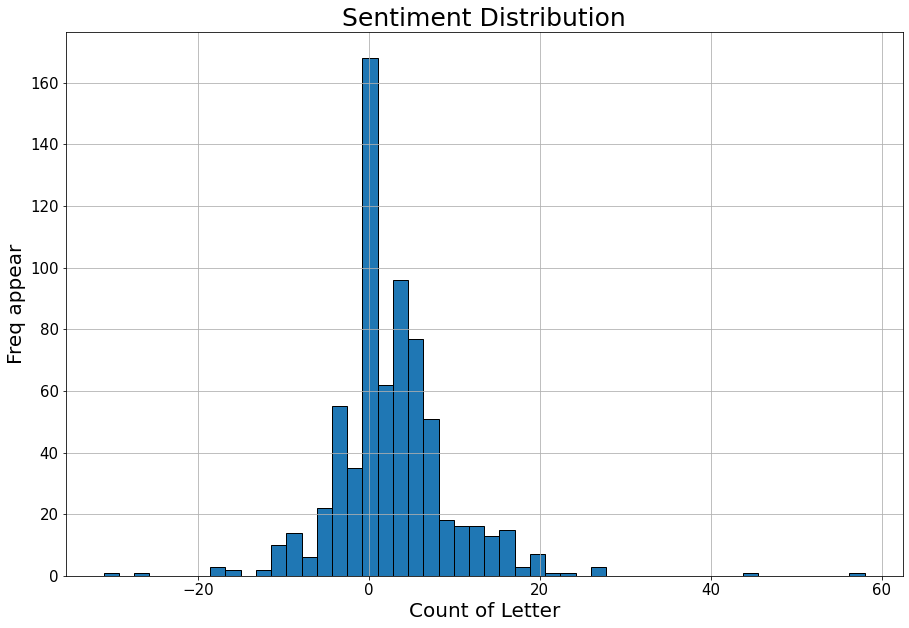

In [43]:
# the distribution of count letter
plt.figure(figsize=(15,10))
data['sentiment'].plot(kind='hist',bins=50,ec='black')
plt.grid()
plt.xticks(rotation=0,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.title('Sentiment Distribution',fontsize = 25)
plt.xlabel('Count of Letter',fontsize=20)
plt.ylabel('Freq appear',fontsize=20);

In [44]:
# Distribution of Ratings
data['score'].value_counts()

1    254
5    246
2     75
3     67
4     58
Name: score, dtype: int64

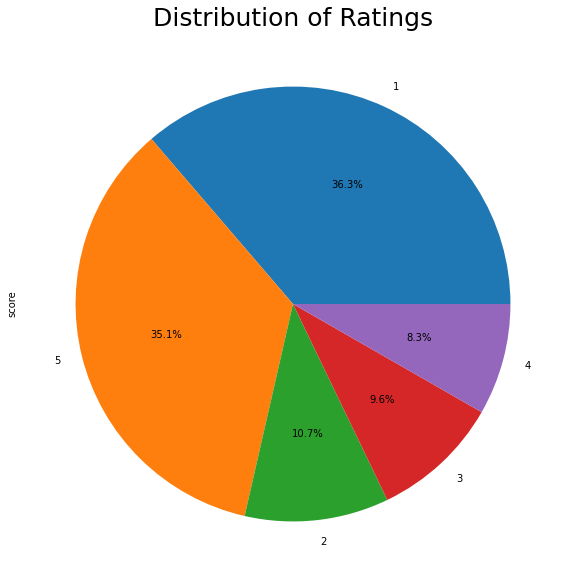

In [45]:
data['score'].value_counts().plot(kind='pie',figsize=(10,10),autopct='%1.1f%%')
plt.title('Distribution of Ratings',fontsize=25);

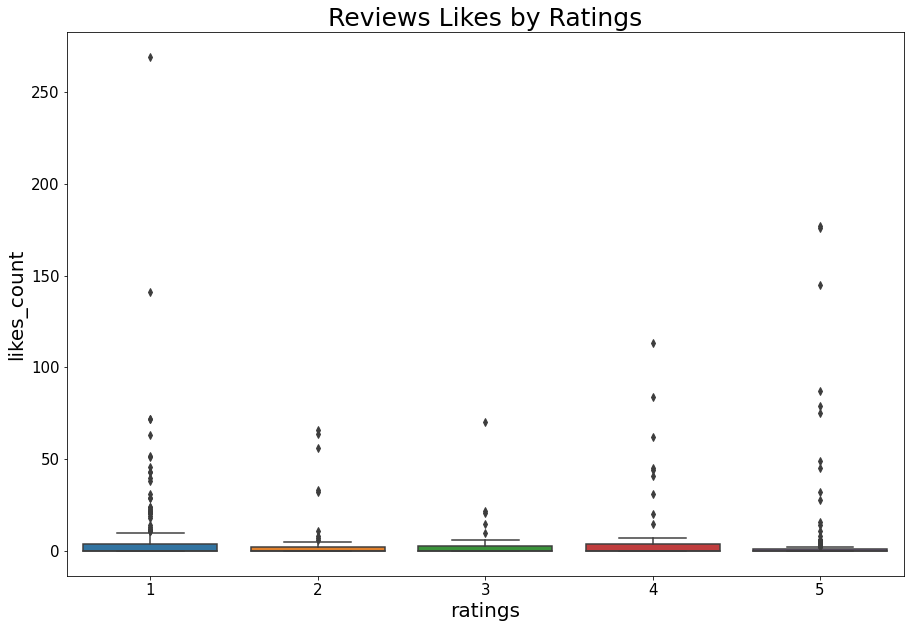

In [46]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data,x='score',y='thumbsUpCount')
plt.title('Reviews Likes by Ratings',fontsize = 25)
plt.xticks(rotation=0,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.xlabel('ratings',fontsize=20)
plt.ylabel('likes_count',fontsize=20);

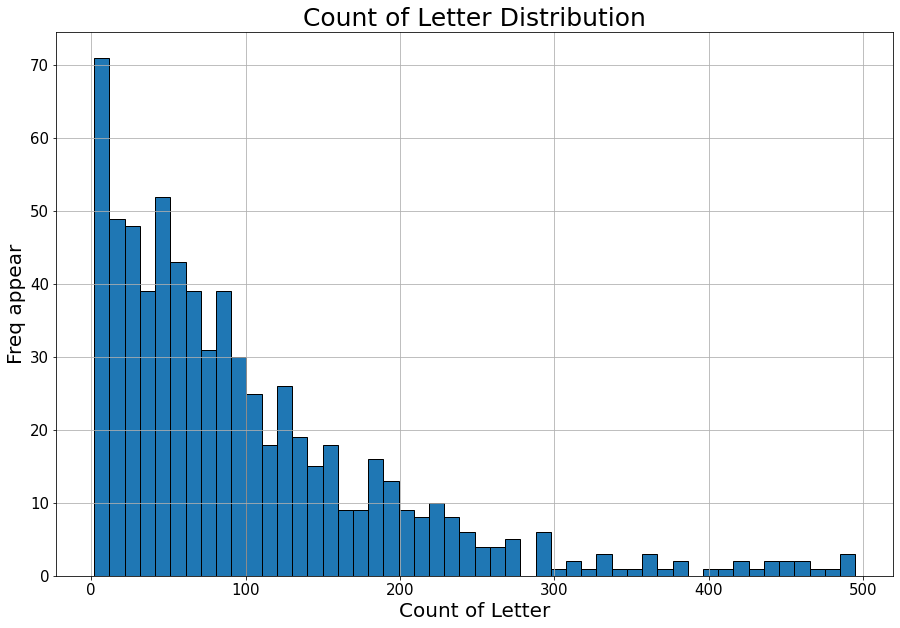

In [47]:
# the distribution of count letter
plt.figure(figsize=(15,10))
data['content_len'].plot(kind='hist',bins=50,ec='black')
plt.grid()
plt.xticks(rotation=0,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.title('Count of Letter Distribution',fontsize = 25)
plt.xlabel('Count of Letter',fontsize=20)
plt.ylabel('Freq appear',fontsize=20);

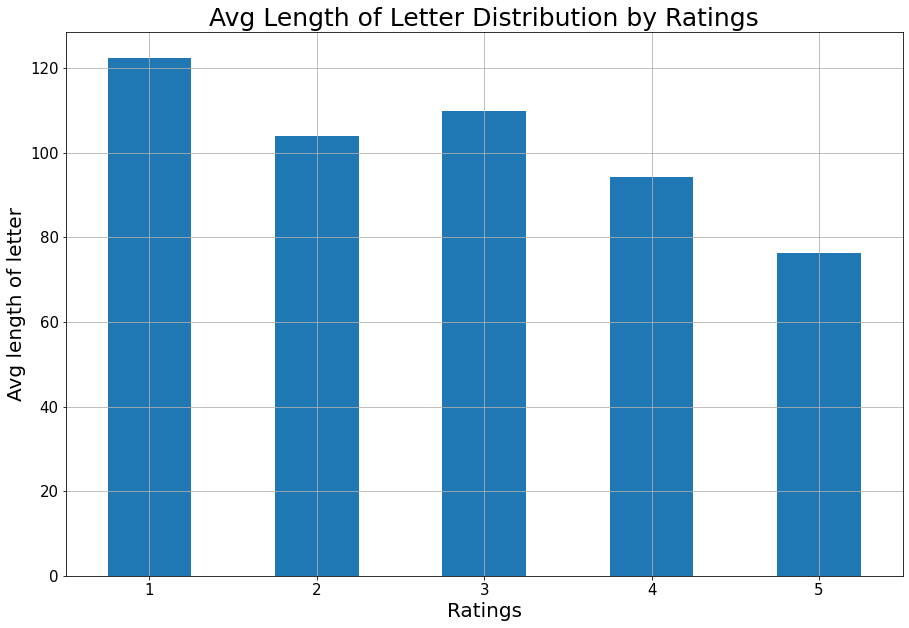

In [48]:
# length of sentence by ratings
plt.figure(figsize=(15,10))
data.groupby('score')['content_len'].mean().plot(kind='bar')
plt.grid()
plt.title('Avg Length of Letter Distribution by Ratings',fontsize = 25)
plt.xticks(rotation=0,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.xlabel('Ratings',fontsize=20)
plt.ylabel('Avg length of letter',fontsize=20);

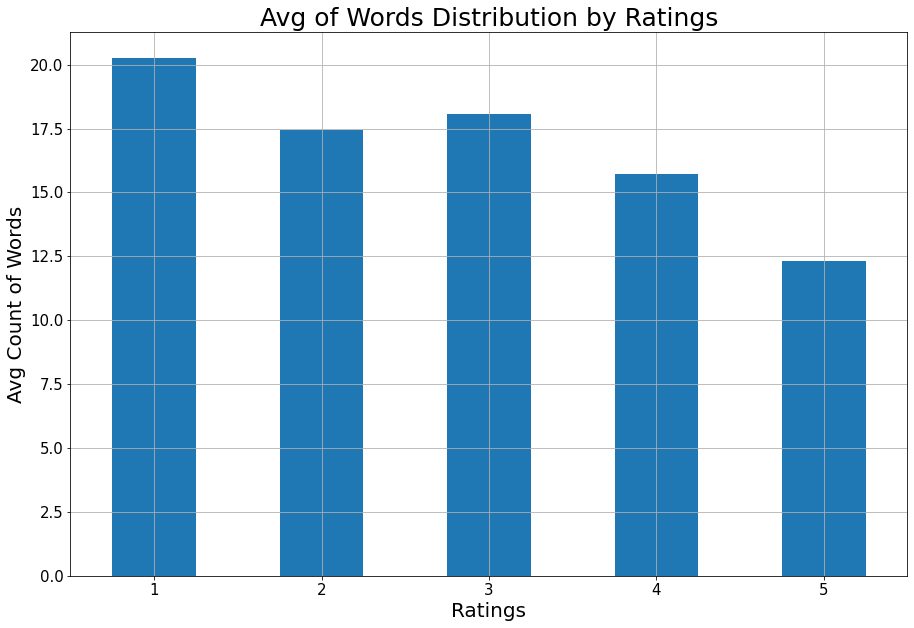

In [49]:
# count of words by rating
plt.figure(figsize=(15,10))
data.groupby('score')['word_count'].mean().plot(kind='bar')
plt.grid()
plt.title('Avg of Words Distribution by Ratings',fontsize = 25)
plt.xticks(rotation=0,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.xlabel('Ratings',fontsize=20)
plt.ylabel('Avg Count of Words',fontsize=20);

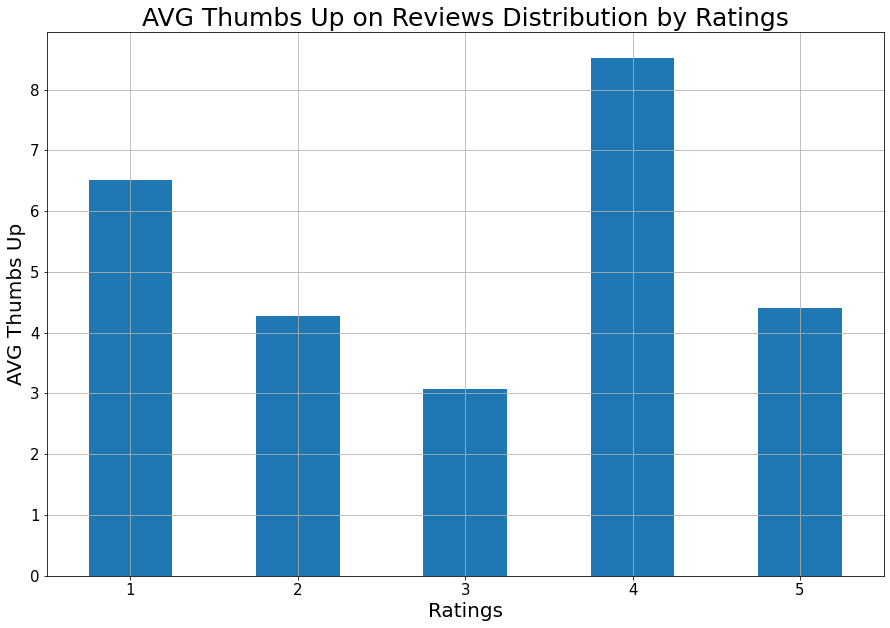

In [50]:
# distribution of total thumbs up
plt.figure(figsize=(15,10))
data.groupby('score')['thumbsUpCount'].mean().plot(kind='bar')
plt.grid()
plt.title('AVG Thumbs Up on Reviews Distribution by Ratings',fontsize = 25)
plt.xticks(rotation=0,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.xlabel('Ratings',fontsize=20)
plt.ylabel('AVG Thumbs Up',fontsize=20);

### 3. Correlation

In [51]:
data

,userName,content,score,thumbsUpCount,at,tokenized_sents,token_stemming,stem,filtered_stem,content_len,word_count,time,sentiment,polarity,lang,english
0,Ahmad Indra,lemot buka eazy saham aja loading mulu mau searching saham nggak bisa,1,0,2023-10-17 21:24:12,"[lemot, buka, eazy, saham, aja, loading, mulu, mau, searching, saham, nggak, bisa]","[lot, buka, eazy, saham, aja, loading, mulu, mau, searching, saham, nggak, bisa]",lot buka eazy saham aja loading mulu mau searching saham nggak bisa,"[buka, eazy, loading, mulu, searching, nggak]",71,12,PM,6,Positive,id,it s slow to open eazy shares it just loads but i want to search for shares i can t
1,Zydan Abli,appnya kenapa lemot ya,3,0,2023-10-17 11:15:40,"[appnya, kenapa, lemot, ya]","[appnya, kenapa, lot, ya]",appnya kenapa lot ya,[appnya],22,4,AM,0,Neutral,id,why is the app slow
2,Rezza Tri Umami,ipot ipottt kog lemoott gak berubah ubah dari dulu sekarang update bukanya makin stabil makin cepet malah semakin lemot huufftt,1,0,2023-10-17 10:51:19,"[ipot, ipottt, kog, lemoott, gak, berubah, ubah, dari, dulu, sekarang, update, bukanya, makin, stabil, makin, cepet, malah, semakin, lemot, huufftt]","[ipot, ipottt, kog, lemoott, gak, ubah, ubah, dari, dulu, sekarang, update, buka, makin, stabil, makin, cepet, malah, makin, lot, huufftt]",ipot ipottt kog lemoott gak ubah ubah dari dulu sekarang update buka makin stabil makin cepet malah makin lot huufftt,"[ipottt, kog, lemoott, gak, ubah, ubah, buka, stabil, cepet, huufftt]",130,20,AM,8,Positive,id,ipot ipot how come it hasn t changed for a long time it s changed from before now the update is not getting more stable it s getting faster it s actually getting slower hufftt
3,Wawan Gunawan,assalamu alaikum warahmatullahi wabarokatuh berkenan,5,0,2023-10-17 00:41:20,"[assalamu, alaikum, warahmatullahi, wabarokatuh, berkenan]","[assalamu, alaikum, warahmatullahi, wabarokatuh, kenan]",assalamu alaikum warahmatullahi wabarokatuh kenan,"[assalamu, alaikum, warahmatullahi, wabarokatuh, kenan]",52,5,AM,4,Positive,id,assalamu alaikum warahmatullahi wabarokatuh pleased
4,Rizky Bahari,sorry rubah bintang dari 5 jadi 2 penarikan biasanya cepat jadi lambat tarik dari 11 oktober sampai tanggal 16 oktober belum masuk,2,0,2023-10-16 12:36:10,"[sorry, rubah, bintang, dari, 5, jadi, 2, penarikan, biasanya, cepat, jadi, lambat, tarik, dari, 11, oktober, sampai, tanggal, 16, oktober, belum, masuk]","[sorry, rubah, bintang, dari, 5, jadi, 2, tari, biasa, cepat, jadi, lambat, tarik, dari, 11, oktober, sampai, tanggal, 16, oktober, belum, masuk]",sorry rubah bintang dari 5 jadi 2 tari biasa cepat jadi lambat tarik dari 11 oktober sampai tanggal 16 oktober belum masuk,"[sorry, rubah, bintang, 5, 2, tari, cepat, lambat, tarik, 11, oktober, tanggal, 16, oktober, masuk]",131,22,PM,-4,Negative,id,sorry changed the star from 5 to 2 withdrawals usually fast so slow withdrawals from october 11th to october 16th not yet received
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Yunita,setelah minta bantuan admin akhirnya di update juga bank account saya pertama diipotpay dibantu diubah dan harus ngajuin lagi yg ke 2 untuk ubah di apk ipotnya semoga nanti saat penarikan gak ada masalah trimakasih udah segera memproses masalah saya semoga kedepannya akan lebih baik lagi,5,45,2023-01-04 10:48:19,"[setelah, minta, bantuan, admin, akhirnya, di, update, juga, bank, account, saya, pertama, diipotpay, dibantu, diubah, dan, harus, ngajuin, lagi, yg, ke, 2, untuk, ubah, di, apk, ipotnya, semoga, nanti, saat, penarikan, gak, ada, masalah, trimakasih, udah, segera, memproses, masalah, saya, semoga, kedepannya, akan, lebih, baik, lagi]","[telah, minta, bantu, admin, akhir, di, update, juga, bank, account, saya, pertama, diipotpay, bantu, ubah, dan, harus, ngajuin, lagi, yg, ke, 2, untuk, ubah, di, apk, ipotnya, moga, nanti, saat, tari, gak, ada, masalah, trimakasih, udah, segera, proses, masalah, saya, moga, depan, akan, lebih, baik, lagi]",telah minta bantu a

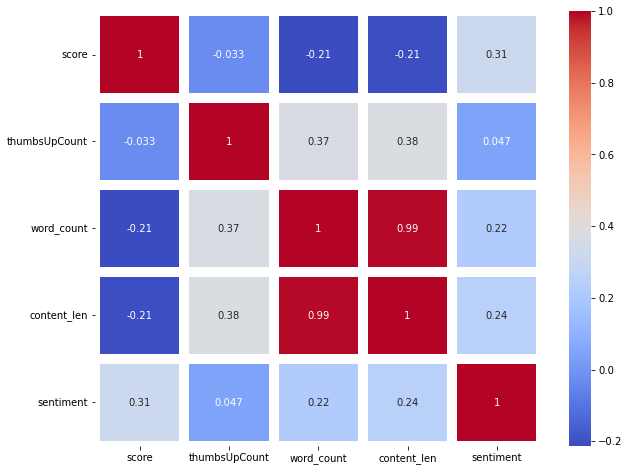

In [52]:
correlation = data[['score','thumbsUpCount','word_count','content_len','sentiment']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,cmap='coolwarm',annot=True,linewidths=10)
plt.xticks(rotation=0,fontsize=10)
plt.yticks(rotation=0,fontsize=10);

### 4. Time Stamp Distribution

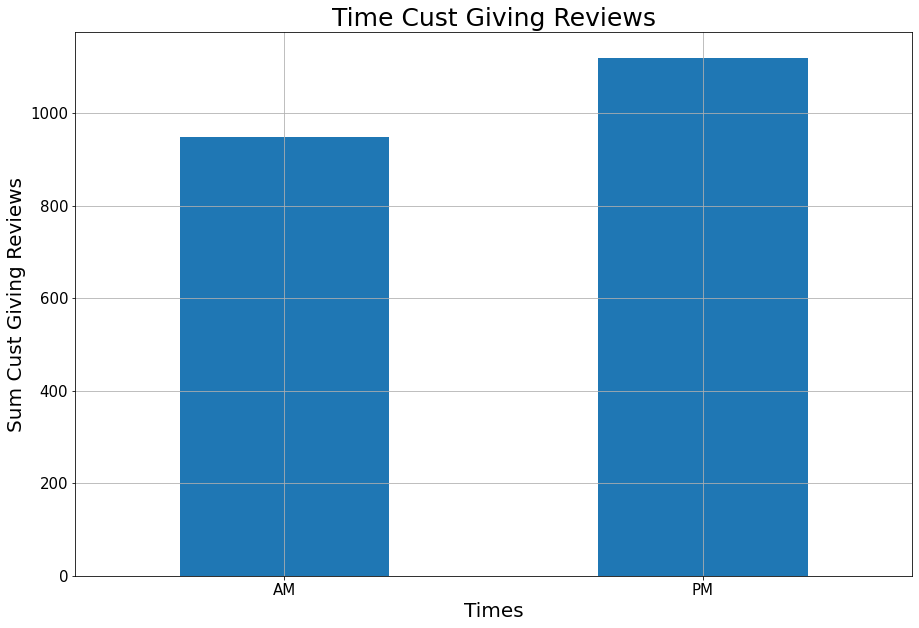

In [53]:
plt.figure(figsize=(15,10))
data.groupby('time')['score'].sum().plot(kind='bar')
plt.grid()
plt.title('Time Cust Giving Reviews',fontsize = 25)
plt.xticks(rotation=0,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.xlabel('Times',fontsize=20)
plt.ylabel('Sum Cust Giving Reviews',fontsize=20);

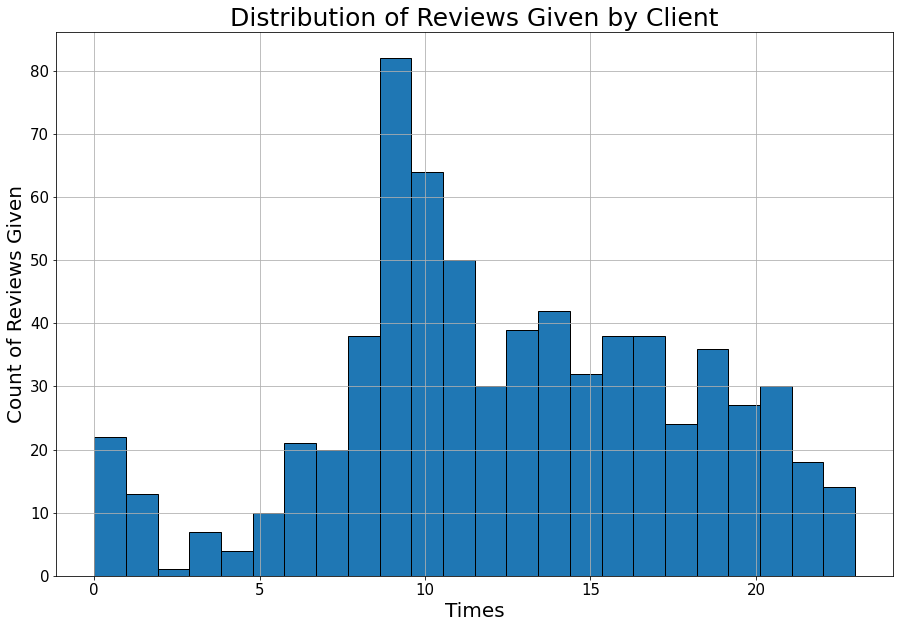

In [54]:
plt.figure(figsize=(15,10))
data['at'].dt.hour.plot(kind='hist',bins=24,ec='black')
plt.grid()
plt.title('Distribution of Reviews Given by Client',fontsize = 25)
plt.xticks(rotation=0,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.xlabel('Times',fontsize=20)
plt.ylabel('Count of Reviews Given',fontsize=20);

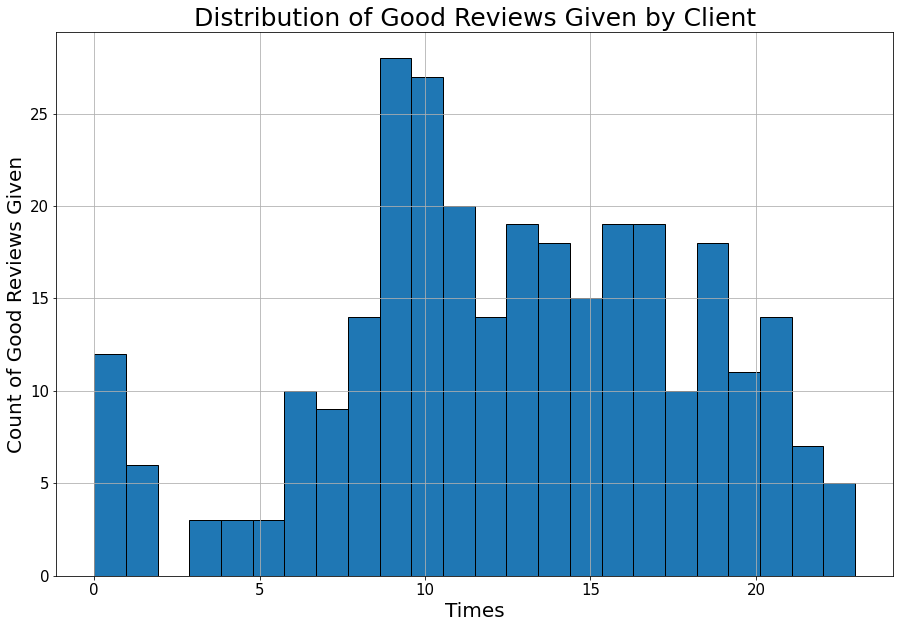

In [55]:
Positive = data[(data['score']==5)|(data['score']==4)]
plt.figure(figsize=(15,10))
Positive['at'].dt.hour.plot(kind='hist',bins=24,ec='black')
plt.grid()
plt.title('Distribution of Good Reviews Given by Client',fontsize = 25)
plt.xticks(rotation=0,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.xlabel('Times',fontsize=20)
plt.ylabel('Count of Good Reviews Given',fontsize=20);

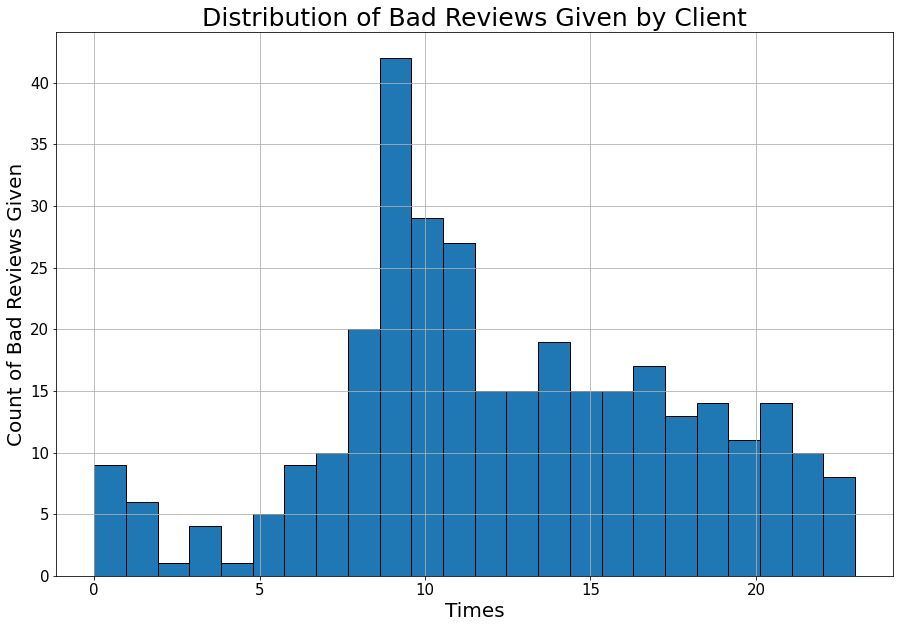

In [56]:
Negative = data[(data['score']==2)|(data['score']==1)]
plt.figure(figsize=(15,10))
Negative['at'].dt.hour.plot(kind='hist',bins=24,ec='black')
plt.grid()
plt.title('Distribution of Bad Reviews Given by Client',fontsize = 25)
plt.xticks(rotation=0,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.xlabel('Times',fontsize=20)
plt.ylabel('Count of Bad Reviews Given',fontsize=20);